### Set up your Mac environment by following the below instructions

#### Prerequisites
- Have [Homebrew](https://brew.sh/) installed.
- Have [pyenv](https://github.com/pyenv/pyenv) installed by running `brew install pyenv`, and configure it properly.
- Install the python versions you wanted by using `pyenv`.

#### Pre-setup
- Install anaconda: `brew cask install anaconda`
- Check what necessary ops you need to do after the installation: `brew cask info anaconda`
- Install jupyter: `conda install jupyter`
- Create our first conda environment: `conda create --no-default-packages -n rdm000_jupyter_practice python=3.7.0`
- Activate the environment we just created: `source activate rdm000_jupyter_practice`
- Launch jupyter notebook in the above environment we created: `jupyter notebook`

### Lets try jupyter notebook

In [ ]:
# Check what environments we have.
!conda info --envs

In [ ]:
# List linked packages in a conda environment.
!conda list

In [ ]:
# To see which magic commands you have available in your interpreter.
%lsmagic

In [ ]:
%pwd

In [ ]:
%%timeit
square_evens = [n * n for n in range(100)]

In [12]:
# Show some data frames.

import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10, 7))
df

,0,1,2,3,4,5,6
0,0.309520,0.116095,-0.654422,0.676126,1.385970,1.710782,-1.217251
1,-0.230898,-2.125736,-0.154492,-0.799816,1.513765,0.322190,0.042963
2,-0.717006,-0.232938,0.647994,-0.289696,-0.835506,0.667125,-0.613770
3,-1.001014,1.636897,-2.028511,-0.014095,-1.007531,1.713799,-0.911406
4,-0.222374,-1.151629,1.108090,1.057971,0.515372,0.783789,0.973265
5,-1.040427,0.405118,0.978004,-0.049997,-0.565550,0.347831,0.362567
6,-0.002261,-0.196352,-1.639586,2.590095,-1.600220,0.353293,1.315650
7,-0.659465,-0.608808,-0.904166,-0.569181,-0.518427,-2.386334,0.468305
8,-0.864397,0.263991,1.418938,0.208923,-2.557665,-0.376186,1.152086
9,1.557903,2.886125,-0.316057,-0.178770,0.871296,1.468176,-0.343211


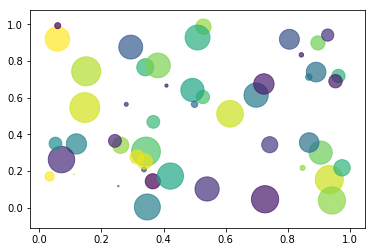

In [13]:
# Simple demo of a scatter plot.

import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (17 * np.random.rand(N)) ** 2

plt.scatter(x, y, s=area, c=colors, alpha=0.7)
plt.show()

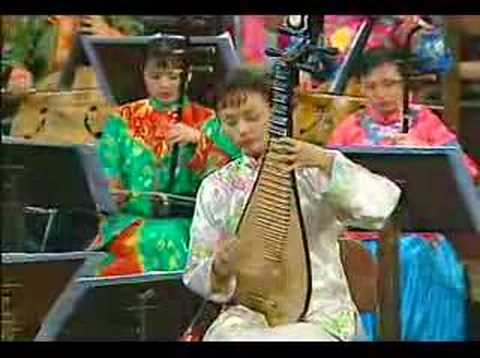

In [14]:
# Load a YouTube video.
from IPython.display import YouTubeVideo
YouTubeVideo('Lykgg5phVJE')

### Conda environment management

In [ ]:
# Export conda 'environment.yml'.
#
# So in future you can create the exactly same environment with `conda env create -f environment.yml`.
#
# Or if you want to specify a different install path than the default one
# of your system(not related to 'prefix' in the environment.yml), just use the '-p' flag followed by the required
# path: `onda env create -f environment.yml -p /home/user/anaconda3/envs/env_name`.
!conda env export | grep -v "^prefix: " > environment.yml

# Cat to see what is in the 'environment.yml'.
%cat environment.yml

### Jupyter kernels

In [ ]:
# List jupyter kernels.
!jupyter kernelspec list

In [ ]:
# Install jupyter Golang kernel, more details refer here: https://github.com/gopherdata/gophernotes#mac
!brew install zmq
!go get -u github.com/gopherdata/gophernotes
!mkdir -p ~/Library/Jupyter/kernels/gophernotes
!cp $GOPATH/src/github.com/gopherdata/gophernotes/kernel/* ~/Library/Jupyter/kernels/gophernotes
!jupyter kernelspec list

### Epilogue
- Although we have both 'Python 3' and `Go` kernels, but jupyter hasn't support to have multiple languages in one notebook yet, more details can follow this github issue: [Allowing multiple languages in one notebook #2815](https://github.com/jupyterlab/jupyterlab/issues/2815).

#### FYI: my `.bash_profile`

```bash
export PS1="[\u@\H \w]\$ "

alias ll='ls -alF'
alias subl='/Applications/Sublime\ Text.app/Contents/SharedSupport/bin/subl'

#
## Prefix 'PATH' in idempotent manner.
#
function prefix_path() {
  for var in "$@"
  do
    if [[ ":$PATH:" != *":$var:"* ]]; then
      export PATH=$var:$PATH
    fi
  done
}

#
## Setting GOROOT should NOT be necessary for newer version Go,
## and you can always get $GOROOT by `go env GOROOT`.
#
export GOPATH="$HOME/go_projects"
prefix_path "$GOPATH/bin"

#
## For function `nvm`.
#
export NVM_DIR="$HOME/.nvm"
. "$(brew --prefix nvm)/nvm.sh"

#
## For command `envsubst`.
#
prefix_path "$(brew --prefix gettext)/bin"

#
## For anaconda.
#
prefix_path '/usr/local/anaconda3/bin'

#
## For 'pyenv'.
#
if which pyenv > /dev/null && [[ ":$PATH:" != *'/.pyenv/'* ]]; then
 eval "$(pyenv init -)"
fi

#
## For 'jenv'.
#
if which jenv > /dev/null && [[ ":$PATH:" != *'/.jenv/'* ]]; then
 eval "$(jenv init -)"
fi

if [ -f /usr/local/etc/bash_completion.d ]; then
  . /usr/local/etc/bash_completion.d
fi
```